### NMR shieldings
* Input molecule from SMILES,
* Optimization with MMFF then ab-initio
* Anisotropic shift calculation



In [9]:
#####################################
#
# Computing NMR shielding constants
#
######################################
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import rdDetermineBonds, rdMolTransforms
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import Image, display
import pyscf
import gpu4pyscf
from gpu4pyscf import dft
from gpu4pyscf.properties.shielding import eval_shielding
from pyscf.geomopt.geometric_solver import optimize
from gpu4pyscf.dft import rks
import matplotlib.pyplot as plt
from pathlib import Path
import sys, time, random

### Definitionen für das Script
#smiles = 'CCCC(=S)N(CC)CC'  # Gesuchtes Molekül als SMILES
smiles =r'C1=CC(c2ccccc2)(c2ccccc2)Oc2ccc3c([nH]c4ccccc43)c21'  #das r steht für raw string

#zufällige Job-ID erzeugen
eintrags_id = random.randint(1, 100000000)

jobname = f"id{eintrags_id}"

# Filename vom Jobnamen bilden
xyzin =f"xyz/{jobname}.xyz"
logfile=f"logs/{jobname}_gpu.log"
logfile2=f"logs/{jobname}_nmr_gpu.log"
xyzfile=xyzin   # definiert den Namen des xyz Files, welcher in pySCF verwendet wird
xyzout=f"xyz/{jobname}_opt1.xyz"  # definiert den Ausgabefile für den  Optimierungsschritt
molbild = f"xyz/{jobname}.png"

randomKoords=True #use randowm coordinates in Force Field calculation

def save_molecule_as_xyz(mol, filename):
    """Speichert ein Molekül als XYZ-Datei."""
    with open(filename, 'w') as f:
        num_atoms = mol.GetNumAtoms()
        f.write(f"{num_atoms}\n\n")  # Anzahl der Atome und leerer Kommentar

        for atom in mol.GetAtoms():
            pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())
            symbol = atom.GetSymbol()
            f.write(f"{symbol} {pos.x:.4f} {pos.y:.4f} {pos.z:.4f}\n")

molin = Chem.MolFromSmiles(smiles)

# 3D-Koordinaten generieren
molin = Chem.AddHs(molin)  # Wasserstoffatome hinzufügen
AllChem.EmbedMolecule(molin, useRandomCoords=randomKoords)  

# Optimierung mit Kraftfeld

max_iter=200
mmff_variant="MMFF94"
max_iterations = 40
counter = 0


status = AllChem.MMFFOptimizeMolecule(molin,mmff_variant)

if status == 0 : print("Optimierung mit Kraftfeld erfolgreich")
if status == 1 : print("weitere Optimierungen erforderlich")
if status == -1 : print("Initialisierung fehlgeschlageb")


while status == 1 and counter < max_iterations:
           
        # Beispiel für eine Berechnung, die value verändert
        status =AllChem.MMFFOptimizeMolecule(molin,mmff_variant, max_iter)  # Standardanzahl Iterartionen mit Kraftfeld machen
        if counter == 0 : print("weitere Optimierungen mit Kraftfeld gestartet")
        # Zähler erhöhen
        counter += 1
        if status == 0 : print("weitere Optimierung mit Kraftfeld erfolgreich")

print(f"Anzahl der Durchläufe mit dem Kraftfeld: {counter}")
### Jetzt sollte das Molekül mit dem Kraftfeld optimiert sein

# XYZ-Datei speichern
save_molecule_as_xyz(molin, xyzin)
print(f"XYZ-Datei {xyzin} wurde erfolgreich erstellt.")



Optimierung mit Kraftfeld erfolgreich
Anzahl der Durchläufe mit dem Kraftfeld: 0
XYZ-Datei xyz/id12439791.xyz wurde erfolgreich erstellt.


geometric-optimize called with the following command line:
/home/sthomas/.conda/envs/mycuda11neu/lib/python3.12/site-packages/ipykernel_launcher.py -f /home/sthomas/.local/share/jupyter/runtime/kernel-d0e99666-e58b-419e-b49e-9a8335471351.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%

output file: logs/id12439791_gpu.log


Step    0 : Gradient = 1.137e-02/3.419e-02 (rms/max) Energy = -1170.3848231206
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.94076e-01 5.01005e-01 5.66493e-01
Step    1 : Displace = 9.911e-02/1.505e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.166e-02/3.372e-02 (rms/max) E (change) = -1170.3824580356 (+2.365e-03) Quality = -0.189
Hessian Eigenvalues: 2.26684e-02 2.30000e-02 2.30000e-02 ... 4.98364e-01 5.66032e-01 6.40512e-01
Step    2 : Displace = 4.777e-02/8.372e-02 (rms/max) Trust = 4.956e-02 (-) Grad = 4.222e-03/1.432e-02 (rms/max) E (change) = -1170.3914735613 (-9.016e-03) Quality = 0.942
Hessian Eigenvalues: 2.26722e-02 2.29988e-02 2.30000e-02 ... 4.99840e-01 5.66338e-01 7.07404e-01
Step    3 : Displace = 5.954e-02/1.461e-01 (rms/max) Trust = 7.008e-02 (+) Grad = 3.900e-03/1.357e-02 (rms/max) E (change) = -1170.3916222463 (-1.487e-04) Quality = 0.070
Hessian Eigenvalues: 2.12024e-02 2.28718e-02 2.30000e-02 ... 5.58073e-01 5.66304e-01 5.82346e-01
Step    4 : Displac

Optimized coordinate:
[[  1.94220982   2.10779446  -2.78387438]
 [  0.66774403   4.21956104  -2.20634321]
 [ -0.67841261   4.41741791   0.31666112]
 [ -0.64693231   7.16519835   1.19506266]
 [  1.23496961   8.05130744   2.8205335 ]
 [  1.29869088  10.59445357   3.51507048]
 [ -0.49736557  12.27842078   2.57299722]
 [ -2.3692655   11.40187624   0.9339862 ]
 [ -2.44661468   8.85823364   0.25421454]
 [ -3.37540608   3.36137694   0.26856648]
 [ -4.49735044   2.40678101  -1.91601445]
 [ -6.95684369   1.44589371  -1.84504902]
 [ -8.30180236   1.41861655   0.41728566]
 [ -7.18004185   2.36128637   2.61664416]
 [ -4.73823132   3.33051027   2.53878557]
 [  0.71582601   3.00566949   2.21770515]
 [  1.49164524   0.62844004   1.57355493]
 [  1.77322413  -1.13629341   3.52578731]
 [  2.66678371  -3.55121722   2.99811121]
 [  3.27036208  -4.20504193   0.5093199 ]
 [  2.98611852  -2.37747014  -1.42764847]
 [  3.71478864  -3.44877121  -3.69755994]
 [  4.43828302  -5.94062815  -3.30086405]
 [  5.283983

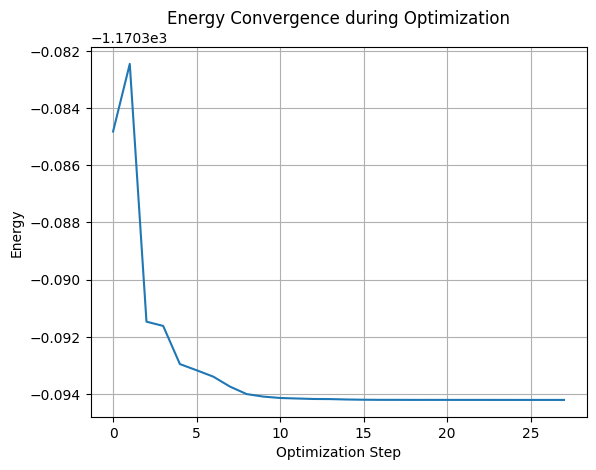

In [10]:
### ab- initio Geometrieoptimierung
### Molekuel und Berechnungssetup
### hier kann verkürzt werden

mol = pyscf.M(atom=xyzfile, basis='6-31g*', output=logfile)
mf_GPU = rks.RKS(mol, xc='b3lyp').density_fit()
mf_GPU.disp = 'd4'    #original d3bj  für Becke-Johnson dumping, möglich sind: d3bj, d3zero, d3bjm, d3zerom, '3op, d4
mf_GPU.grids.level = 3
mf_GPU.conv_tol = 1e-12   # 1e-10 im Original
mf_GPU.max_cycle = 50   # 50 im Original

# Listen für Energien und Gradienten
energies = []
gradients = []

def callback(envs):
    energies.append(envs['energy'])  # SCF-Gesamtenergie speichern
    gradients.append(envs['gradients'])
    #print(envs)


start_time = time.time()
mol_eq = optimize(mf_GPU, maxsteps=50, callback=callback)  #maxtsep = 20 im Original
print("Optimized coordinate:")
print(mol_eq.atom_coords())
print('geometry optimization took', time.time() - start_time, 's')
print()
# Plotten der SCF-Energien
plt.plot(energies)
plt.title('Energy Convergence during Optimization')
plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


In [11]:
# 
# Die Geometrie sichern
#
print(mol_eq.tostring(format='xyz')) # Das stammt aus dem User Guide

mol_eq.tofile(xyzout, format='xyz')

48
XYZ from PySCF
C           1.02777        1.11540       -1.47316
C           0.35335        2.23290       -1.16755
C          -0.35900        2.33760        0.16757
C          -0.34234        3.79166        0.63240
C           0.65352        4.26057        1.49256
C           0.68724        5.60634        1.86010
C          -0.26319        6.49746        1.36157
C          -1.25376        6.03361        0.49424
C          -1.29469        4.68758        0.13452
C          -1.78619        1.77876        0.14212
C          -2.37990        1.27361       -1.01391
C          -3.68140        0.76513       -0.97636
C          -4.39312        0.75070        0.22082
C          -3.79951        1.24954        1.38467
C          -2.50736        1.76243        1.34347
O           0.37880        1.59053        1.17356
C           0.78934        0.33256        0.83269
C           0.93835       -0.60130        1.86577
C           1.41120       -1.87922        1.58653
C           1.73060       -2.225

'48\nXYZ from PySCF\nC           1.02777        1.11540       -1.47316\nC           0.35335        2.23290       -1.16755\nC          -0.35900        2.33760        0.16757\nC          -0.34234        3.79166        0.63240\nC           0.65352        4.26057        1.49256\nC           0.68724        5.60634        1.86010\nC          -0.26319        6.49746        1.36157\nC          -1.25376        6.03361        0.49424\nC          -1.29469        4.68758        0.13452\nC          -1.78619        1.77876        0.14212\nC          -2.37990        1.27361       -1.01391\nC          -3.68140        0.76513       -0.97636\nC          -4.39312        0.75070        0.22082\nC          -3.79951        1.24954        1.38467\nC          -2.50736        1.76243        1.34347\nO           0.37880        1.59053        1.17356\nC           0.78934        0.33256        0.83269\nC           0.93835       -0.60130        1.86577\nC           1.41120       -1.87922        1.58653\nC         

In [12]:
####################################
#
# Ergebnisansicht des Moleküls
#
####################################


import py3Dmol

# Erstelle ein 3D-Objekt
view = py3Dmol.view(width=800, height=400)

# Lese das XYZ-File
with open(xyzout, 'r') as file:
    xyz_data = file.read()

# Füge die XYZ-Daten zur Ansicht hinzu
view.addModel(xyz_data, 'xyz')

# Setze die Darstellung (z.B. als Kugeln und Stäbe)
view.setStyle({'stick': {}})


# Render die Ansicht
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
# NMR Berechnung

start_time = time.time()

dateipfad = Path(xyzout)

if dateipfad.exists():
    print("Die Datei existiert.")
else:
    print("Die Datei existiert nicht.")
    sys.exit(1)

mol = pyscf.M(atom=xyzout, basis='6-31g*', output=logfile2)
mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()
tensor = eval_shielding(mf)


abschirmung = tensor[0].get()+tensor[1].get()
end_time = time.time()
print(f'Walltime: {end_time-start_time} Sekunden')
print("Programm kann fortgesetzt werden!")

Die Datei existiert.
output file: logs/id12439791_nmr_gpu.log
Walltime: 192.43889904022217 Sekunden
Programm kann fortgesetzt werden!


In [14]:
#################################################################################################
#
# Constanten für Verschiebungsberchnung
#
# CSHESHIRE Repository (Tantillo)
#
# Table 1a and 1b
#
# delta = (intercept -sigma)/ - slope
#
# Das Vorzeichen von slope wird gleich in die Definition der Konstanten eingepflegt
#
# TMS shielding aus eigener Berechnung delta = sigma - TMS
#
##################################################################################################

intercept1a = 187.4743
slope1a = 0.9269
intercept1b = 188.4418
slope1b = 0.9449
intercept1c = 188.01
slope1c = 0.9378
tmsshield = 190.2218

h_intercept1a = 32.2884
h_slope1a = 0.9957
h_intercept1b = 32.2109
h_slope1b = 1.0157
h_intercept1c = 32.2448
h_slope1c = 1.004
h_tmsshield = 32.1893

shift = [0] *mol.natm
shift1a = [0] *mol.natm
shift1b= [0] *mol.natm
shift1c= [0] *mol.natm
shifttms= [0] *mol.natm


data = []
for i in range(mol.natm):
    shift[i]= (abschirmung[i,0,0] + abschirmung[i,1,1] + abschirmung[i,2,2])/3
    #print(f"Atom {mol._atom[i][0]} {i} hat eine totale Abschirmung von {shift[i]} .")

    if  mol._atom[i][0] =='C':
        shift1a[i] = (intercept1a-shift[i])/slope1a
        shift1b[i] = (intercept1b-shift[i])/slope1b
        shift1c[i] = (intercept1c-shift[i])/slope1c
        shifttms[i] = tmsshield - shift[i]
        data.append({'Atom': mol._atom[i][0], 'Index': i+1, 'Totale Abschirmung': shift[i], 'table1a': shift1a[i], 'table1b' : shift1b[i], 'table1c' : shift1c[i], 'TMS' : shifttms[i]})
'''
    if  mol._atom[i][0] =='H':
        shift1a[i] = (h_intercept1a-shift[i])/h_slope1a
        shift1b[i] = (h_intercept1b-shift[i])/h_slope1b
        shift1c[i] = (h_intercept1c-shift[i])/h_slope1c
        shifttms[i] = h_tmsshield - shift[i]
        data.append({'Atom': mol._atom[i][0], 'Index': i+1, 'Totale Abschirmung': shift[i], 'table1a': shift1a[i], 'table1b' : shift1b[i], 'table1c' : shift1c[i], 'TMS' : shifttms[i]})
 '''
print("weiter")

weiter


In [15]:
import pandas as pd
from IPython.display import display, HTML
# Erstelle ein DataFrame
df = pd.DataFrame(data)

# Setze die Spaltenüberschriften
df.columns = ['Atom', 'Index', 'Totale Abschirmung', 'table1a', 'table1b', 'table1c', 'TMS']

# Verwende Styler, um die Schriftgröße zu ändern
styled_df = df.style.set_table_attributes('style="font-size: 17px;"')  # Ändere die Schriftgröße hier

# Zeige die Tabelle an
display(HTML(f"<h2 style=color:#069>{jobname}</h2>"))
display(styled_df)

# Zeige die Tabelle an

,Atom,Index,Totale Abschirmung,table1a,table1b,table1c,TMS
0,C,1,75.349032,120.968031,119.687552,120.133256,114.872768
1,C,2,67.716803,129.202176,127.764839,128.271696,122.504997
2,C,3,107.455751,86.329214,85.708592,85.897045,82.766049
3,C,4,50.328609,147.961690,146.166992,146.813170,139.893191
4,C,5,69.855686,126.894610,125.501232,125.990951,120.366114
5,C,6,69.346651,127.443790,126.039951,126.533748,120.875149
6,C,7,70.545277,126.150635,124.771429,125.255623,119.676523
7,C,8,68.969512,127.850672,126.439081,126.935901,121.252288
8,C,9,69.440219,127.342843,125.940926,126.433974,120.781581
9,C,10,52.237553,145.902197,144.146732,144.777614,137.984247


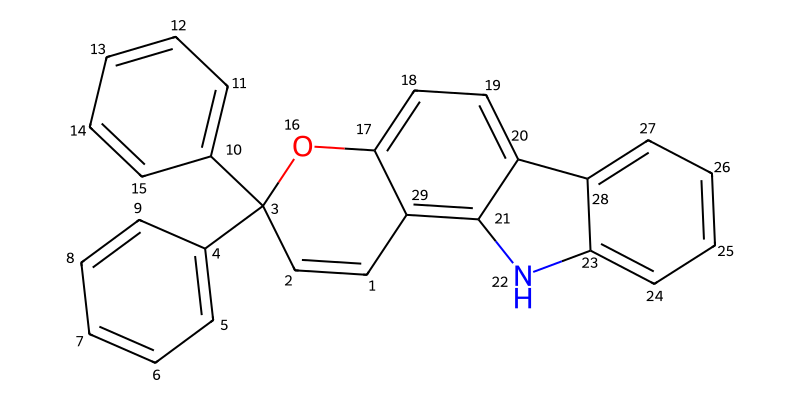

In [16]:

def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx() + 1))
    return mol

# Molekül aus einer XYZ-Datei lesen

raw_mol = Chem.MolFromXYZFile(xyzout)

if raw_mol is not None:
    mol2 = Chem.Mol(raw_mol)
    Chem.rdDetermineBonds.DetermineBonds(mol2)

    # 2D-Koordinaten berechnen
    AllChem.Compute2DCoords(mol2)

    # Atomnummern anzeigen
    show_atom_number(mol2, 'atomNote')


    ### Wasserstoff aus Molekül löschen
    mol3 = Chem.RemoveHs(mol2)
    # Größe der Moleküldarstellung ändern und Bild speichern
    img = Draw.MolToImage(mol3, size=(800, 400))  # Größe anpassen
    img.save(molbild)  # Bild speichern
    #img.show()  # Bild anzeigen
    display(Image(filename=molbild))
else:
    print("Fehler beim Laden des Moleküls aus der XYZ-Datei.")